In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, misctools, tools_lens, binning as bn, tqdm, maptools
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [3]:
pobj = prjlib.analysis_init(t='la',freq='com',fltr='none',snmin=1,snmax=1,ntype='base_roll50')
qobj = tools_lens.init_qobj(pobj.stag,False,rlmin=300,rlmax=4096,qlist=['TT','TE','EE','EB'])
i = 1
lmax = 2048
q = 'TT'

In [4]:
W, __ = prjlib.window('la',ascale=5.,nside=2048) # apodized window already multiplied to phi alms
M = W/(W+1e-30)

In [5]:
iklm = prjlib.load_input_plm(pobj.fpalm[1],2048,ktype='k')

In [6]:
kalm = tools_lens.load_klms(qobj.f[q].alm[1],lmax,fmlm=qobj.f[q].mfb[1])
kalm[:10] = 0.

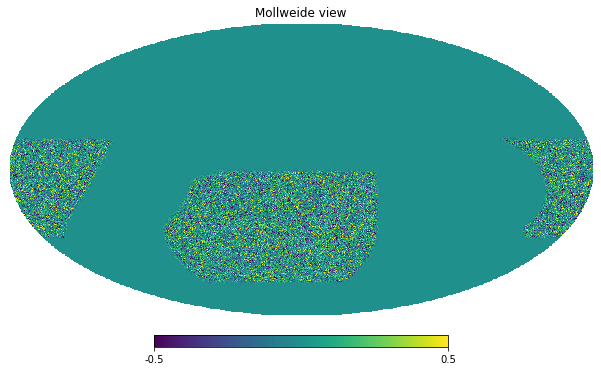

In [7]:
kmap = curvedsky.utils.hp_alm2map(2048,lmax,lmax,kalm[:lmax+1,:lmax+1])
hp.mollview(kmap*M,min=-.5,max=.5)

In [ ]:
rho = {}
for i in range(10):
    for j in range(10):
        region = maptools.create_region(2048,[50+i*10,60+i*10],[-50+j*5,-45+j*5])
        print(i,j,np.average(kmap**2*region))
        cklm = curvedsky.utils.hp_map2alm(2048,lmax,lmax,kmap*region)
        rho[i,j] = curvedsky.utils.alm2rho(lmax,iklm,cklm)

0 0 4.208012299410195e-05
0 1 4.9591988020363264e-05
0 2 5.037873971414162e-05
0 3 6.293557654389529e-05
0 4 7.16927836823968e-05
0 5 6.637409954053619e-05
0 6 5.92608160728209e-05
0 7 5.919876445361215e-05
0 8 6.347665730417361e-05
0 9 2.8660364637019557e-05
1 0 4.164753992383029e-05
1 1 5.238246996008408e-05
1 2 5.247859930489182e-05
1 3 6.037939109185603e-05
1 4 6.585107598229522e-05
1 5 5.6987279963777864e-05
1 6 6.185107463879555e-05
1 7 6.805604908798216e-05
1 8 4.9614813197219947e-05
1 9 6.103036648771046e-06
2 0 4.40289854616922e-05
2 1 5.0405574080652674e-05
2 2 5.575508094372963e-05
2 3 6.190733036674267e-05
2 4 6.496281510002086e-05
2 5 6.123779567964161e-05
3 1 5.225564542299657e-05
3 2 5.273237695058904e-05
3 3 5.9801974616075546e-05
3 4 6.007693156526395e-05
3 5 1.1773045357217039e-05
3 6 8.03997563153981e-08
3 7 4.0957859047038095e-08
3 8 2.9523068256481184e-08
3 9 2.3186773319650096e-08
4 0 3.0282141602189205e-05
4 1 2.8349208799295056e-05
4 2 2.6130453041092094e-05
4 3

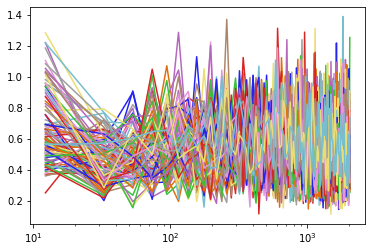

In [20]:
xscale('log')
mb = bn.multipole_binning(100,lmin=2,lmax=2048)
for i in range(10):
    for j in range(10):
        plot(mb.bc,bn.binning(rho[i,j],mb)*mb.bc)